# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [1]:
!python -m pip install kaggle==1.6.12

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 705.5 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.0/163.0 kB 3.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 10.4 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=e876f21d8c151c5ac55a7da7668a78b6c870762016eb526ef6294301044c42a3
  Stored in directory: /home/student/.cache/pip/wheels/1e/0b/7c/50f8e89c3d2f82838dbd7afeddffbb9357003009ada98216c7
Successfully built kaggle
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
# to read csv file that is stored in google drive
!pip install --target=/workspace ucimlrepo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 57.5 MB/s eta 0:00:0000:010:01
  Using cached certifi-2024.7.4-py3-none-any.whl (162 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 52.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 30.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.11.2 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.0.1 which is incompatible.


In [9]:
pip install gdown

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import requests

**Note:** Restart the kernel to use updated package(s).

## 1. Gather data



### **1.1.** Problem Statement
Problem : Analysis for the factors that influence student performance in secondary education (high school). 
The used data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). 

This analysis will answer the following research questions :

1) Which school is doing better in each subject ('GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)?
2) How does parents' job influence students' performance in general?


Student Performance dataset from UCirvine

https://archive.ics.uci.edu/dataset/320/student+performance


### **1.2.** Gather at least two datasets using two different data gathering methods


#### **Dataset 1**

Type: csv file

Method:The data was gathered using the downloading files manually  from  :  https://archive.ics.uci.edu/dataset/320/student+performance 


Dataset variables:

*   school
*   sex
*   age
*   address
*   famsize ( Family Size)
*   Pstatus ( Parent cohabitation status)
*   Medu ( Mother's education level)
*   Fedu ( Father's education level)
*   Mjob ( Mother's Job)
*   Fjob( Father's Job)
*   reason
*   guardian 
*   traveltime
*   studytime
*   failures
*   schoolsup
*   famsup
*   paid
*   activities
*    nursery
*    higher
*    internet
*    romantic
*    famrel
*    freetime
*    goout
*    Dalc
*    Walc
*    health
*    absences
*    G1  (First period grade)
*    G2  (Second period grade)
*    G3 (final year grade )

In [5]:
#FILL IN 1st data gathering and loading method
math_students=pd.read_csv('raw-data-students/student-mat.csv',sep=';')

In [6]:
math_students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
math_students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

#### Dataset 2

Type: CSV File

Method: Downloading file programatically from google  drive

Dataset variables:

*   school
*   sex
*   age
*   address
*   famsize ( Family Size)
*   Pstatus ( Parent cohabitation status)
*   Medu ( Mother's education level)
*   Fedu ( Father's education level)
*   Mjob ( Mother's Job)
*   Fjob( Father's Job)
*   reason
*   guardian 
*   traveltime
*   studytime
*   failures
*   schoolsup
*   famsup
*   paid
*   activities
*    nursery
*    higher
*    internet
*    romantic
*    famrel
*    freetime
*    goout
*    Dalc
*    Walc
*    health
*    absences
*    G1  (First period grade)
*    G2  (Second period grade)
*    G3 (final year grade )

In [8]:
import gdown 
#FILL IN 2nd data gathering and loading method
urls= ['https://drive.google.com/uc?export=download&id=1bxuskhZOTPyQsBp7BzZBQxpgr4Q74Ysq']
for url in urls:
    # Download the file
    output = 'file.csv'
    gdown.download(url, output, quiet=False)
    # Read the CSV file using pandas
    por_students= pd.read_csv(output,sep=";")
    

Downloading...
From: https://drive.google.com/uc?export=download&id=1bxuskhZOTPyQsBp7BzZBQxpgr4Q74Ysq
To: /workspace/file.csv
100%|██████████| 93.2k/93.2k [00:00<00:00, 74.9MB/s]


In [9]:
por_students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [10]:
por_students.shape

(649, 33)

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [209]:
#Optional: store the raw data in your local data store
math_students.to_pickle('data//raw_math_students.pkl')
por_students.to_pickle('data//raw_por_students.pkl')

In [210]:
math_students=pd.read_pickle('data//raw_math_students.pkl')
por_students=pd.read_pickle('data//raw_por_students.pkl')

## 2. Assess data


### Quality Issue 1:

In [211]:
#FILL IN - Inspecting the dataframe visually
math_students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [14]:
math_students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [15]:
por_students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


#### Analysizn the three grades columns ( G1, G2, G3) : For math class,  Grade 2 and Grade 3 have some zero values which means that some sudents did not take all the exams
#### For portoguees students Grade 1, Grade 2 and Grade 3 have some zero values which means that some students did not take all the exams and some might did not take any

In [16]:
#FILL IN - Inspecting the dataframe programmatically
def df_with_specific_number_of_zeros(df,z):
    df2=df
    df2 = df2.loc[(df2[['G1','G2','G3']].apply(lambda row: (row == 0).sum(), axis=1)==z)]
    return df2
     


In [17]:
print("Number of math students who have one zero in their grade",len(df_with_specific_number_of_zeros(math_students,1)))
print("Number of math students who have two zeros in their grade",len(df_with_specific_number_of_zeros(math_students,2)))
print("Number of math students who have three zeros in their grade",len(df_with_specific_number_of_zeros(math_students,3)))

Number of math students who have one zero in their grade 25
Number of math students who have two zeros in their grade 13
Number of math students who have three zeros in their grade 0


In [18]:
print("Number of por students who have one zero in their grade",len(df_with_specific_number_of_zeros(por_students,1)))
print("Number of por students who have two zeros in their grade",len(df_with_specific_number_of_zeros(por_students,2)))
print("Number of por students who have three zeros in their grade",len(df_with_specific_number_of_zeros(por_students,3)))

Number of por students who have one zero in their grade 9
Number of por students who have two zeros in their grade 7
Number of por students who have three zeros in their grade 0


In [19]:
sorted_values_math=math_students['G1'].unique().tolist()
print(sorted(sorted_values_math))
sorted_values_math=math_students['G2'].unique().tolist()
print(sorted(sorted_values_math))
sorted_values_math=math_students['G3'].unique().tolist()
print(sorted(sorted_values_math))

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [20]:
sorted_values_por=por_students['G1'].unique().tolist()
print(sorted(sorted_values_por))
sorted_values_por=math_students['G2'].unique().tolist()
print(sorted(sorted_values_por))
sorted_values_por=math_students['G3'].unique().tolist()
print(sorted(sorted_values_por))

[0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


#### Issue and justification:  The least non-zero grade in both math and portogees class is 4. 
#### Math class : There is 25 students who have exactly 1 zero grade, 13 students who have two zeros in their marks
#### Portoguees class  :  There is 9 students who have exactly 1 zero grade, 7 students who have two zeros in their grades

#### Issue  : The grades columns (G1, G2, G3) are the most important columns to answer the research questions related to students performance, having students with zero mark could mean that these students did not take the exams so we can not study their performance

#### Solution :  
#### 1) Remove all rows with two zeros (13 students in math class, 7 students in prtoguees class)
#### 2) Replace the remaining zeros with nan value
#### 3) Impute the nan values by the average of the other two marks for each student)


### Quality Issue 2:

In [145]:
#FILL IN - Inspecting the dataframe visually
math_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [146]:
por_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

#### The famsize  (family size ) column in both dataframes should be numeric value 
#### In the given dataset family size  is (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

In [136]:
#FILL IN - Inspecting the dataframe programmatically
math_students['famsize'].unique().tolist()

['GT3', 'LE3']

In [137]:
por_students['famsize'].unique().tolist()

['GT3', 'LE3']

Issue and justification: 
#### IMO Family size should be a real number to be able to study the effect of familly size on students' performance, however both datasets do not provide enough info about the family size as the feature holds two values 'GT3', 'LE3'. To make it simpler I will replace LE3 with 1 which indicates small size family and will replace GT3 with 2 which indicates big size family

#### Solution : Replace GT3 with 2 and LE3 with 1

### Tidiness Issue 1:

In [149]:
#FILL IN - Inspecting the dataframe visually
# check if each row is an observation
#math_students.head(5)
math_students.sample(5)
math_students.tail(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [150]:
#FILL IN - Inspecting the dataframe programmatically
# check if each column has only one value
print(math_students['Mjob'].unique().tolist())
print(math_students['Pstatus'].unique().tolist())
print(math_students['sex'].unique().tolist())
print(math_students['school'].unique().tolist())
print(math_students['Fjob'].unique().tolist())
print("***************")
print(por_students['Mjob'].unique().tolist())
print(por_students['Pstatus'].unique().tolist())
print(por_students['sex'].unique().tolist())
print(por_students['school'].unique().tolist())
print(por_students['Fjob'].unique().tolist())

['at_home', 'health', 'other', 'services', 'teacher']
['A', 'T']
['F', 'M']
['GP', 'MS']
['teacher', 'other', 'services', 'health', 'at_home']
***************
['at_home', 'health', 'other', 'services', 'teacher']
['A', 'T']
['F', 'M']
['GP', 'MS']
['teacher', 'other', 'services', 'health', 'at_home']


#### Issue and justification: No issues, each column is a variable , each row is an observation 

### Tidiness Issue 2: 

In [151]:
#FILL IN - Inspecting the dataframe visually
math_students.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [152]:
por_students.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


#### In the dataset documentation it is given that there are  there are 382 students that belong to both datasets . 

#### These students can be identified by searching the follwping identical attributes school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'.

#### It is hard to inspect this visually because both dataset does not have student id, comparing  12 attributes visually is not practical

#### Issue and justification: we have 382 common students who have 6 grades, 3 grades for each class.
#### The common students dataframe columns' names are not descriptive and there are many columns that needs to be dropped.
#### Solution : 1) Rename grades column 

#### 2) Drop unnecessary columns

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [176]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
clean_math_students=math_students.copy()
clean_por_students=por_students.copy()

### **Quality Issue 1: Delete rows with students who have more than one zero in their grades

In [177]:
def df_with_specific_number_of_zeros(df,z):
    df = df.loc[(df[['G1','G2','G3']].apply(lambda row: (row == 0).sum(), axis=1)==z)]
    return df
     

In [178]:
# index of rows with two zeros in math class
temp_math=df_with_specific_number_of_zeros(clean_math_students,2)
math_index_to_be_deleted=temp_math.index.tolist()
print(math_index_to_be_deleted)
print("Number of rows with two zeros",len(math_index_to_be_deleted))

[130, 131, 134, 135, 136, 137, 144, 153, 162, 242, 244, 269, 332]
Number of rows with two zeros 13


In [179]:
# index of rows with two zeros in portogees class
temp_por=df_with_specific_number_of_zeros(clean_por_students,2)
por_index_to_be_deleted=temp_por.index.tolist()
print(por_index_to_be_deleted)
print("Number of rows with two zeros",len(por_index_to_be_deleted))

[440, 563, 567, 597, 603, 605, 610]
Number of rows with two zeros 7


In [180]:
# FILL IN - Apply the cleaning strategy
# remove rows with two zeros in math dataset
clean_math_students.drop(math_index_to_be_deleted, inplace=True)  
#clean_math_students.reset_index(drop=True, inplace=True)


In [181]:
# FILL IN - Validate the cleaning was successful
print("Number of rows in row data",len(math_students))
print("Number of rows in after removing rows with two zeros",len(clean_math_students))
print("Number of deleted rows",len(math_students)-len(clean_math_students))

Number of rows in row data 395
Number of rows in after removing rows with two zeros 382
Number of deleted rows 13


In [182]:
# remove rows with two zeros
clean_por_students.drop(por_index_to_be_deleted, inplace=True)  
clean_por_students.reset_index(drop=True, inplace=True)


In [183]:
# FILL IN - Validate the cleaning was successful
print("Number of columns in row data",len(por_students))
print("Number of columns in after removing rows with two zeros",len(clean_por_students))
print("Number of deleted rows",len(por_students)-len(clean_por_students))

Number of columns in row data 649
Number of columns in after removing rows with two zeros 642
Number of deleted rows 7


#### Justification: it is confirmed that 13 students were deleted from math class and 7 students were deleted from portogees class

### **Quality Issue 2: impute the zero grade with the average of the two other grades

In [184]:
#FILL IN - Apply the cleaning strategy
# Replace the remaining zeros with nan
clean_math_students[['G1','G2','G3']]=clean_math_students[['G1','G2','G3']].replace(0,np.nan)
clean_por_students[['G1','G2','G3']]=clean_por_students[['G1','G2','G3']].replace(0,np.nan)

In [185]:
#FILL IN - Validate the cleaning was successful
#clean_math_students.describe()
# check that min values are not zeros in all grades
clean_por_students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,641.000000,642.000000,634.000000
mean,16.732087,2.520249,2.314642,1.566978,1.934579,0.213396,3.934579,3.176012,3.188474,1.498442,2.275701,3.535826,3.699377,11.471139,11.696262,12.187697
std,1.214781,1.133958,1.102007,0.749019,0.831566,0.582861,0.947328,1.050303,1.167818,0.923348,1.282427,1.445676,4.650161,2.668601,2.665364,2.691824
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,5.000000,1.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [187]:
# Total number of NaN values in the entire DataFrame
total_nan_math = clean_math_students.isna().sum().sum()
print("\nTotal number of NaN values in math_students:", total_nan_math)

total_nan_por = clean_por_students.isna().sum().sum()
print("\nTotal number of NaN values in po_students:", total_nan_por)



Total number of NaN values in math_students: 25

Total number of NaN values in po_students: 9


In [188]:
# fill nan values in math class with the average of the two other grades
clean_math_students['G1']=clean_math_students['G1'].fillna(((clean_math_students['G2']+clean_math_students['G3'])/2))
clean_math_students['G2']=clean_math_students['G2'].fillna(((clean_math_students['G1']+clean_math_students['G3'])/2))
clean_math_students['G3']=clean_math_students['G3'].fillna(((clean_math_students['G1']+clean_math_students['G2'])/2))


# fill nan values in por class with the average of the two other grades
clean_por_students['G1']=clean_por_students['G1'].fillna(((clean_por_students['G2']+clean_por_students['G3'])/2))
clean_por_students['G2']=clean_por_students['G2'].fillna(((clean_por_students['G1']+clean_por_students['G3'])/2))
clean_por_students['G3']=clean_por_students['G3'].fillna(((clean_por_students['G1']+clean_por_students['G2'])/2))


In [189]:
# check that Total number of NaN values in the entire DataFrame after imputation is now zero
total_nan_math = clean_math_students.isna().sum().sum()
print("\nTotal number of NaN values in math_students:", total_nan_math)

total_nan_por = clean_por_students.isna().sum().sum()
print("\nTotal number of NaN values in math_students:", total_nan_por)



Total number of NaN values in math_students: 0

Total number of NaN values in math_students: 0


#### Justification:  Grades should not be zero because grades columns are essential in answering the research questions we have. Grade zero could mean that the student did not take the exam so we can not analyze the performance when the grade is zero

### **Quality Issue 3 : Change the binary values for the famsize variable

In [190]:
#Replace GT3 with 2 and LE3 with 1
clean_math_students.replace({'GT3':2 , 'LE3':1},inplace=True)
clean_por_students.replace({'GT3':2 , 'LE3':1},inplace=True)
#FILL IN - Inspecting the dataframe programmatically

/tmp/ipykernel_54/4251397079.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_math_students.replace({'GT3':2 , 'LE3':1},inplace=True)
/tmp/ipykernel_54/4251397079.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_por_students.replace({'GT3':2 , 'LE3':1},inplace=True)


In [191]:
# check results
print(clean_math_students['famsize'].unique().tolist())
print(clean_por_students['famsize'].unique().tolist())

[2, 1]
[2, 1]


### **Tidiness Issue 1: FILL IN**

In [192]:
#FILL IN - Apply the cleaning strategy
#FILL IN - Inspecting the dataframe programmatically
# in the dataset documentation it is given that there are  there are 382 students that belong to both datasets . 
#These students can be identified by searching the follwping identical attributes school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'
df1=math_students
#df2=por_students[['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason',  'nursery', 'internet']]
df2=por_students
common_students = pd.merge(df1, df2, how='inner', on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'])

In [195]:
#FILL IN - Validate the cleaning was successful
# check that the number of common students is 382 which is the same number that is given in the readme file
len(common_students)

382

In [196]:
common_students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_x', 'traveltime_x', 'studytime_x',
       'failures_x', 'schoolsup_x', 'famsup_x', 'paid_x', 'activities_x',
       'nursery', 'higher_x', 'internet', 'romantic_x', 'famrel_x',
       'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x', 'absences_x',
       'G1_x', 'G2_x', 'G3_x', 'guardian_y', 'traveltime_y', 'studytime_y',
       'failures_y', 'schoolsup_y', 'famsup_y', 'paid_y', 'activities_y',
       'higher_y', 'romantic_y', 'famrel_y', 'freetime_y', 'goout_y', 'Dalc_y',
       'Walc_y', 'health_y', 'absences_y', 'G1_y', 'G2_y', 'G3_y'],
      dtype='object')

#### Justification:We need to know students who study math and portoguees to answer the  reasearch questions that are not related to specific class


### **Tidiness Issue 2: Removing icecessary columns

In [197]:
#FILL IN - Apply the cleaning strategy
#remove columns we are not intrested in
clean_math_students=clean_math_students.drop(['reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],axis=1)

In [198]:
clean_math_students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'G1', 'G2', 'G3'],
      dtype='object')

In [199]:
clean_por_students=por_students.drop(['reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],axis=1)


In [200]:
clean_math_students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'G1', 'G2', 'G3'],
      dtype='object')

In [201]:
common_students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_x', 'traveltime_x', 'studytime_x',
       'failures_x', 'schoolsup_x', 'famsup_x', 'paid_x', 'activities_x',
       'nursery', 'higher_x', 'internet', 'romantic_x', 'famrel_x',
       'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x', 'absences_x',
       'G1_x', 'G2_x', 'G3_x', 'guardian_y', 'traveltime_y', 'studytime_y',
       'failures_y', 'schoolsup_y', 'famsup_y', 'paid_y', 'activities_y',
       'higher_y', 'romantic_y', 'famrel_y', 'freetime_y', 'goout_y', 'Dalc_y',
       'Walc_y', 'health_y', 'absences_y', 'G1_y', 'G2_y', 'G3_y'],
      dtype='object')

In [202]:
# keep only the columns we are intrested in
common_students=common_students[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu','Mjob', 'Fjob','G1_x', 'G2_x', 'G3_x','G1_y', 'G2_y', 'G3_y']]

In [203]:
#FILL IN - Validate the cleaning was successful
common_students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'G1_x', 'G2_x', 'G3_x', 'G1_y', 'G2_y', 'G3_y'],
      dtype='object')

#### For common_students_dataframe
#### Rename 'G1_x', 'G2_x', 'G3_x' with 'G1_math', 'G2_math', 'G3_math'
#### Rename 'G1_y', 'G2_y', 'G3_y' with 'G1_y'por', 'G2_por', 'G3_por'

In [204]:
common_students.rename(columns={'G1_x':'G1_math','G2_x':'G2_math','G3_x':'G3_math','G1_y':'G1_por','G2_y':'G2_por','G3_y':'G3_por'},inplace=True)

In [205]:
common_students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,G1_math,G2_math,G3_math,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,5,6,6,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,5,5,6,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,7,8,10,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,15,14,15,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,6,10,10,11,13,13


#### Justification: Unncessary columns were deleted for simplicity and for clarity
#### Columns were renamed for clarity

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [207]:
#FILL IN - Remove unnecessary variables and combine datasets
# common students is the new dataset that has students who belong to both classes (Math and portoguees)
common_students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,G1_math,G2_math,G3_math,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,5,6,6,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,5,5,6,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,7,8,10,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,15,14,15,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,6,10,10,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,F,18,U,LE3,T,3,1,teacher,services,7,9,8,15,15,16
378,MS,F,18,U,GT3,T,1,1,other,other,6,5,0,7,8,7
379,MS,F,18,U,GT3,T,1,1,other,other,6,5,0,11,12,9
380,MS,M,17,U,LE3,T,3,1,services,services,14,16,16,10,10,10


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [ ]:
#FILL IN - saving data
# The raw data was saved as pickle file at the beginning of the dataframe

# Saving the clean data :
# save the math class data set
clean_math_students.to_pickle('results//clean_math_students.pkl')
#save portoguees class dataset
clean_por_students.to_pickle('results//clean_por_students.pkl')

# save the dataset with common students in both class
common_students.to_pickle('results//common_students.pkl')

In [2]:
clean_math_students=pd.read_pickle('results//clean_math_students.pkl')
clean_por_students=pd.read_pickle('results//clean_por_students.pkl')
common_students=pd.read_pickle('results//common_students.pkl')

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.


    1) Which school is doing better in each subject ('GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)?

    3) How does the area (urban, rural) students live in influence students' performance in general?


In [3]:
#calulate the final mark for each student in the math class
clean_math_students['final_mark']=((clean_math_students['G1']+clean_math_students['G2']+clean_math_students['G3'])/60)*100

In [5]:
#calculate the final mark for each student in portoguees class
clean_por_students['final_mark']=((clean_por_students['G1']+clean_por_students['G2']+clean_por_students['G3'])/60)*100

In [6]:
clean_math_students.describe()

,age,famsize,Medu,Fedu,G1,G2,G3,final_mark
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.701571,1.706806,2.753927,2.520942,11.026178,11.078534,11.248691,55.589005
std,1.273575,0.455824,1.099832,1.083559,3.284313,3.252959,3.311823,16.004517
min,15.000000,1.000000,0.000000,0.000000,3.000000,4.000000,4.000000,21.666667
25%,16.000000,1.000000,2.000000,2.000000,8.000000,9.000000,9.000000,45.000000
50%,17.000000,2.000000,3.000000,2.000000,11.000000,11.000000,11.000000,55.000000
75%,18.000000,2.000000,4.000000,3.000000,13.000000,13.000000,14.000000,66.666667
max,22.000000,2.000000,4.000000,4.000000,19.000000,19.000000,20.000000,96.666667


In [7]:
clean_por_students.describe()

,age,Medu,Fedu,G1,G2,G3,final_mark
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,11.399076,11.570108,11.906009,58.125321
std,1.218138,1.134552,1.099931,2.745265,2.913639,3.230656,14.166801
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.666667
25%,16.000000,2.000000,1.000000,10.000000,10.000000,10.000000,50.000000
50%,17.000000,2.000000,2.000000,11.000000,11.000000,12.000000,58.333333
75%,18.000000,4.000000,3.000000,13.000000,13.000000,14.000000,66.666667
max,22.000000,4.000000,4.000000,19.000000,19.000000,19.000000,93.333333


#### To answer the research questions, a new column was added to each data set which is final mark. The final mark is the sum of G1, 

#### G2, G3 converted to 100 for simplicity. 

#### The maximum final mark in math class is 96.6 and the minimum is 16.004517

#### The maximum final mark in portoguees class is 93 and the minimum is 6

###### *Research question 1 :* Which school is doing better in each subject ('GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)?

In [26]:
# Visual 1 - FILL IN
from PIL import Image, ImageDraw, ImageFont
import numpy as np

def draw_histogram(data, filename='histogram.png'):
    width, height = 600, 400
    margin = 50
    num_bins = 10
    bin_width = (width - 2 * margin) / num_bins
    
    # Create a blank image
    image = Image.new('RGB', (width, height), 'white')
    draw = ImageDraw.Draw(image)

    # Calculate histogram
    data_min, data_max = min(data), max(data)
    bin_edges = np.linspace(data_min, data_max, num_bins + 1)
    histogram, _ = np.histogram(data, bins=bin_edges)

    # Normalize histogram
    max_histogram = max(histogram)
    histogram = [h / max_histogram * (height - 2 * margin) for h in histogram]

    # Draw bars
    for i in range(num_bins):
        x1 = margin + i * bin_width
        y1 = height - margin
        x2 = x1 + bin_width
        y2 = height - margin - histogram[i]
        draw.rectangle([x1, y1, x2, y2], fill='blue', outline='black')

    # Draw axes
    draw.line([(margin, height - margin), (width - margin, height - margin)], fill='black')  # x-axis
    draw.line([(margin, height - margin), (margin, margin)], fill='black')  # y-axis

    # Add axis labels
    font = ImageFont.load_default()
    draw.text((width / 2, height - margin + 10), 'Final marks', font=font, fill='black')
    draw.text((margin - 40, height / 2), 'Number of students in  school ', font=font, fill='black', anchor='mm')

    # Draw x-axis tick marks and labels
    for i in range(num_bins + 1):
        x = margin + i * bin_width
        draw.line([(x, height - margin), (x, height - margin + 10)], fill='black')
        tick_label = f'{int(bin_edges[i])}'
        draw.text((x - 10, height - margin + 15), tick_label, font=font, fill='black')

    # Draw y-axis tick marks and labels
    step = (height - 2 * margin) // 5  # Number of steps on y-axis
    for i in range(6):
        y = height - margin - i * step
        draw.line([(margin - 10, y), (margin, y)], fill='black')
        tick_label = f'{int(i * max_histogram / 5)}'
        draw.text((margin - 40, y - 5), tick_label, font=font, fill='black')

    # Save the image
    image.save(filename)
    print(f"Histogram saved as {filename}")

# filter dataframe to get only GP schoo;
filtered_df = clean_math_students[clean_math_students['school']=='GP']

data= filtered_df['final_mark'].tolist()

# draw histogram for GP SCHOOL

draw_histogram(data, filename='histogram.png')


Histogram saved as histogram.png


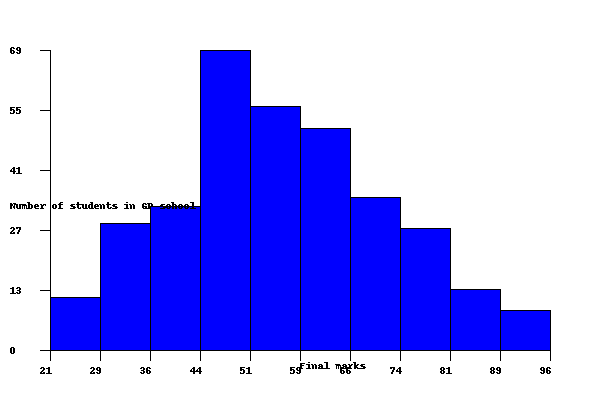

In [24]:
show_image('histogram.png')

Histogram saved as histogram2.png


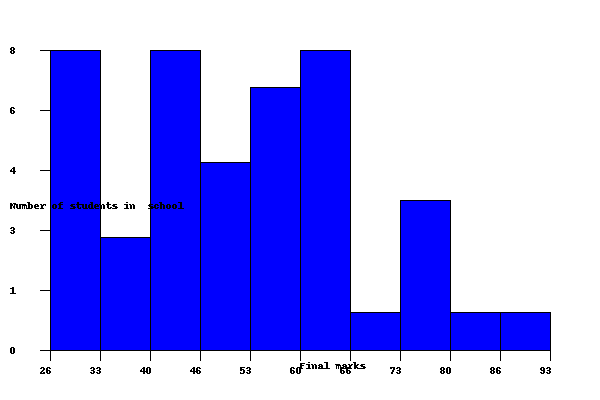

In [27]:
filtered_df = clean_math_students[clean_math_students['school']=='MS']

data2= filtered_df['final_mark'].tolist()

# draw histogram for GP SCHOOL

draw_histogram(data2, filename='histogram2.png')
show_image('histogram2.png')

*Answer to research question 1 (datset 1 math class) :* Based on the previous histograms, students of GP schools achived better grades that students of MS school. Number of students who got more than 66% in math in GP school is more than number of students who got more than 66% in math in MS school. Also, the marks distribution in GP school is close to be normally distributed

Histogram saved as histogram3.png


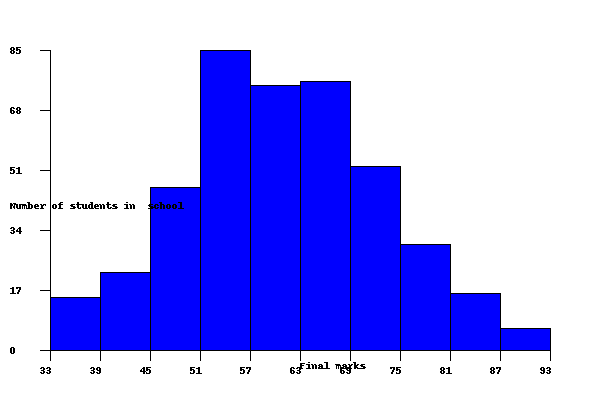

In [31]:
# filter dataframe to get only GP schoo;
filtered_df = clean_por_students[clean_por_students['school']=='GP']

data= filtered_df['final_mark'].tolist()

# draw histogram for GP SCHOOL

draw_histogram(data, filename='histogram3.png')
show_image('histogram3.png')

Histogram saved as histogram4.png


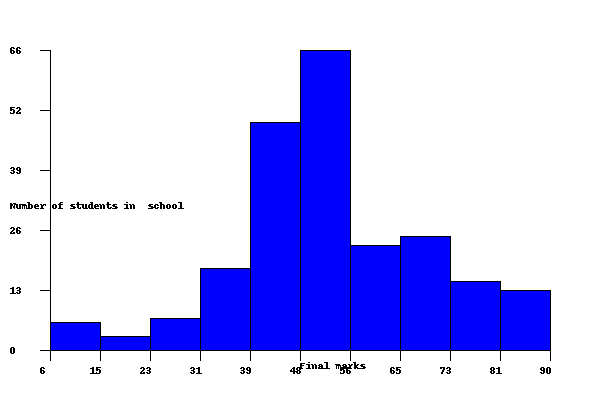

In [32]:
filtered_df = clean_por_students[clean_por_students['school']=='MS']

data4= filtered_df['final_mark'].tolist()

# draw histogram for GP SCHOOL

draw_histogram(data4, filename='histogram4.png')
show_image('histogram4.png')

*Answer to research question 1 (datset 2 Portoguees class) :* Based on the previous histograms, students of GP schools achived better grades that students of MS school in portoguees, the histograms show that in GP school the majority of students got marks over 56% while the majority of students in MS  school got marks less than 56%

##### research question 1 : The conclusion is if the exams are unified between the two schools and the exams are applied under the same circumstances then, based on the data we have,  I would recoment GP school for students who want to learn math and portoguees

###### *Research question 2 :  How does the  father and mother's jobs influence students' performance in general?

###### Research question 2 will be answered bsaed on the common_students dataset which is the result of merging the two datasets. Common_students dataset has grades for students who took both math and portoguees class

In [9]:
# calculate final mark for each student. The final mark is the average of math and portoguees marks out of 100 . 
common_students['math_avg']=((common_students['G1_math']+common_students['G2_math']+common_students['G3_math'])/60)*100
common_students['por_avg']=((common_students['G1_por']+common_students['G2_por']+common_students['G3_por'])/60)*100
common_students['final_mark']=((common_students['por_avg'] +common_students['math_avg'] )/2)

In [10]:
common_students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,G1_math,G2_math,G3_math,G1_por,G2_por,G3_por,math_avg,por_avg,final_mark
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,5,6,6,0,11,11,28.333333,36.666667,32.500000
1,GP,F,17,U,GT3,T,1,1,at_home,other,5,5,6,9,11,11,26.666667,51.666667,39.166667
2,GP,F,15,U,LE3,T,1,1,at_home,other,7,8,10,12,13,12,41.666667,61.666667,51.666667
3,GP,F,15,U,GT3,T,4,2,health,services,15,14,15,14,14,14,73.333333,70.000000,71.666667
4,GP,F,16,U,GT3,T,3,3,other,other,6,10,10,11,13,13,43.333333,61.666667,52.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,F,18,U,LE3,T,3,1,teacher,services,7,9,8,15,15,16,40.000000,76.666667,58.333333
378,MS,F,18,U,GT3,T,1,1,other,other,6,5,0,7,8,7,18.333333,36.666667,27.500000
379,MS,F,18,U,GT3,T,1,1,other,other,6,5,0,11,12,9,18.333333,53.333333,35.833333
380,MS,M,17,U,LE3,T,3,1,services,services,14,16,16,10,10,10,76.666667,50.000000,63.333333


In [11]:
common_students.describe()

,age,Medu,Fedu,G1_math,G2_math,G3_math,G1_por,G2_por,G3_por,math_avg,por_avg,final_mark
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,2.806283,2.565445,10.861257,10.712042,10.387435,12.112565,12.238220,12.515707,53.267888,61.444154,57.356021
std,1.173470,1.086381,1.096240,3.349167,3.832560,4.687242,2.556531,2.468341,2.945438,18.833047,12.673466,14.090656
min,15.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,5.000000,0.000000,6.666667,20.000000,20.000000
25%,16.000000,2.000000,2.000000,8.000000,8.250000,8.000000,10.000000,11.000000,11.000000,41.666667,53.333333,47.500000
50%,17.000000,3.000000,3.000000,10.500000,11.000000,11.000000,12.000000,12.000000,13.000000,53.333333,61.666667,56.666667
75%,17.000000,4.000000,4.000000,13.000000,13.000000,14.000000,14.000000,14.000000,14.000000,66.666667,70.000000,66.666667
max,22.000000,4.000000,4.000000,19.000000,19.000000,20.000000,19.000000,19.000000,19.000000,96.666667,93.333333,91.666667


In [41]:
common_students['Mjob'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [42]:
common_students['Fjob'].unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

###### Parent's jobs can have the following values 'teacher', 'other', 'services', 'health', 'at_home'



In [44]:
# Group by Address  and calculate the mean of final_mark

grouped_father_job = common_students.groupby(['Fjob'])['final_mark'].mean().reset_index()
# Display the result
grouped_father_job

,Fjob,final_mark
0,at_home,58.750000
1,health,60.343137
2,other,56.228278
3,services,57.258567
4,teacher,63.010753


In [45]:
grouped_mother_job = common_students.groupby(['Mjob'])['final_mark'].mean().reset_index()
# Display the result
grouped_mother_job

,Mjob,final_mark
0,at_home,53.584906
1,health,63.838384
2,other,54.619565
3,services,59.409722
4,teacher,60.040323


*Answer to research question:* FILL IN

Pie plot saved as pie_plot.png


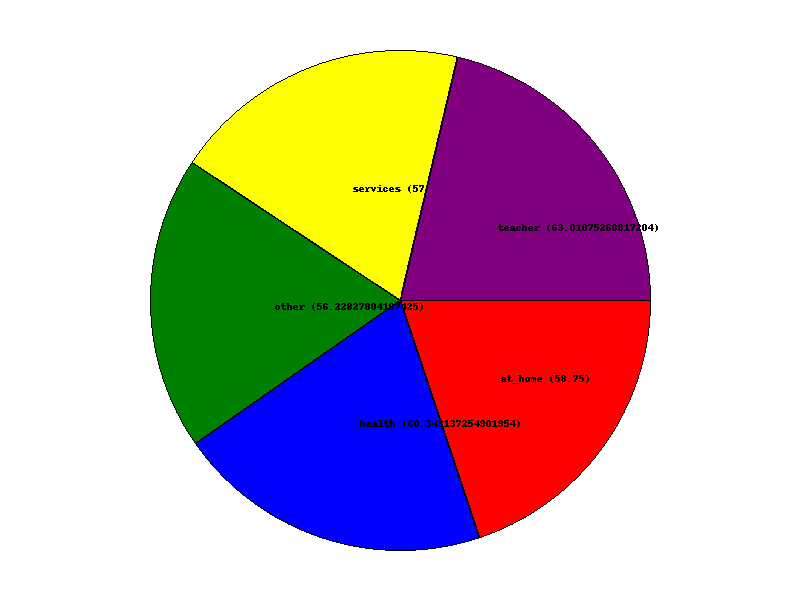

In [46]:
#Visual 2 -
from PIL import Image, ImageDraw, ImageFont
import math

def draw_pie_plot(data, labels, filename='pie_plot.png'):
    # Image dimensions and radius of the pie chart
    width, height = 800, 600
    radius = 250
    center = (width // 2, height // 2)

    # Create a blank image
    image = Image.new('RGB', (width, height), 'white')
    draw = ImageDraw.Draw(image)

    # Calculate total data to get proportions
    total = sum(data)
    start_angle = 0

    # Colors for pie slices
    colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']

    # Function to calculate the position of a label
    def calculate_label_position(angle):
        radians = math.radians(angle)
        x = center[0] + (radius // 2) * math.cos(radians)
        y = center[1] + (radius // 2) * math.sin(radians)
        return (x, y)

    # Draw pie slices and labels
    font = ImageFont.load_default()
    for i, value in enumerate(data):
        end_angle = start_angle + (value / total) * 360
        draw.pieslice([center[0] - radius, center[1] - radius, center[0] + radius, center[1] + radius], 
                      start_angle, end_angle, fill=colors[i % len(colors)], outline='black')
        
        # Calculate label position and draw it
        label_angle = start_angle + (end_angle - start_angle) / 2
        label_position = calculate_label_position(label_angle)
        label_text = f"{labels[i]} ({value})"
        draw.text(label_position, label_text, font=font, fill='black', anchor='mm')
        
        start_angle = end_angle

    # Save the image
    image.save(filename)
    print(f"Pie plot saved as {filename}")

    # Display the image
    image.show()

# Example data
data = grouped_father_job['final_mark'].tolist()
labels = grouped_father_job['Fjob'].tolist()
draw_pie_plot(data, labels, filename='pie_plot.png')


Pie plot saved as pie_plot2.png


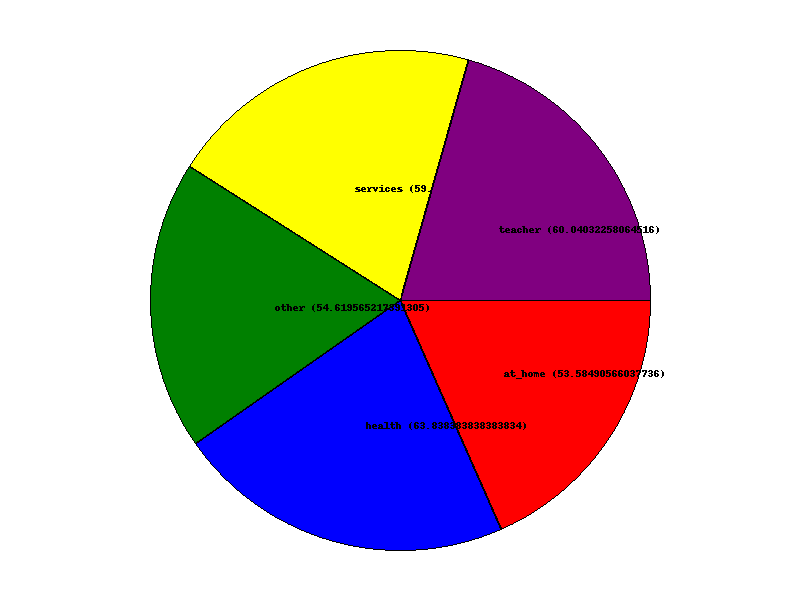

In [47]:
data = grouped_mother_job['final_mark'].tolist()
labels = grouped_mother_job['Mjob'].tolist()
draw_pie_plot(data, labels, filename='pie_plot2.png')

##### Answer to research question:The parents job does not have great impact on students' performance, however the average of final mark is the highest for students whose father or mother work in the healthcare or as a teacher

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* If I had more time I would go back to the assesment phase and assess the datsaet after adding the final_mark column which I used in answering my research questions. I think  there would be some outliers that needs to be handled.

In addition, if I had more time I would put more effort to solve the compatabiity issues with numpy 2 and matplot. I used pillow instead of matplot because matplot did not work with me in this enviroment.

For the research questions, I believe that the dataset is very intresting and I would study more aspects that influence students performance. I would propose more questions like  :  How does gender influence students' performance, How does parents' education influence students' performance, How does family size,parents' cohabitation status, and the area (urban, rural) students live in influence students' performance ?